# Data Wrangling Project: WeRateDogs Twitter Data

## By : Ahmed Sayed


### Project Details
> Our tasks in this project are as follows:

> Data wrangling, which consists of:
    - Gathering data
    - Assessing data
    - Cleaning data
- Then    
> Data Analysis and Visualization

## Data Gathering

In [1]:
#Import Libraries.
import pandas as pd
import numpy as np
import json
import tweepy
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tweepy import OAuthHandler
from timeit import default_timer as timer
from IPython.display import Image
from IPython.display import display
from pandas.plotting import register_matplotlib_converters

In [2]:
#Gather Data

In [3]:
#WeRateDogs Twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')

In [4]:
#Tweet image predictions
df_img = pd.read_csv('image-predictions-3.tsv', sep='\t')

In [5]:
#Twiter info from Twitter API
df_tweet = pd.read_json(open('tweet-json.txt', "r", encoding="utf8"),lines=True)

## Data Assessing

In [6]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [9]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [10]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [11]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [12]:
# Rating numerator
twitter_archive[twitter_archive['rating_numerator'] < 10].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2296,667090893657276420,NaN,NaN,2015-11-18 21:23:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clybe. He is an Anemone Valdez. One ea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667090893...,7,10,Clybe,None,None,None,None
1520,690728923253055490,NaN,NaN,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,8,10,Vinscent,None,None,None,None
1998,672538107540070400,NaN,NaN,2015-12-03 22:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Darby. He's a Fiscal Tutankhamen Waxbeard...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672538107...,7,10,Darby,None,None,None,None


In [13]:
# Rating_denominator
twitter_archive[twitter_archive['rating_denominator'] != 10].sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


In [14]:
#Twitter Image Data Prediction 
df_img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [15]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_img.duplicated().any()

False

In [17]:
# Twitter API Data
df_tweet.sample(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1122,2016-05-11 01:44:07+00:00,730211855403241472,730211855403241472,This is Ziva. She doesn't know how her collar ...,False,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 730211842690162689, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4180,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1540,2016-01-20 00:03:21+00:00,689599056876867584,689599056876867584,Here we see 33 dogs posing for a picture. All ...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689599051189391361, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,12795,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1970,2015-12-05 20:41:29+00:00,673240798075449344,673240798075449344,Magical floating dog here. Very calm. Always h...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 673240782124548096, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1510,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [18]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [19]:
# Create a empty list for insert each tweet info into it
tweets = []

tweet_json = open('tweet-json.txt', 'r')

for line in tweet_json:
    tweet = json.loads(line)
    tweets.append(tweet)
    
tweet_json.close()

In [20]:
 # create a empty dataframe for map the tweet_data info
tweet_data = pd.DataFrame()  

tweet_data['id'] = list(map(lambda tweet: tweet['id'], tweets))

tweet_data['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets))

tweet_data['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets))

In [21]:
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [22]:
tweet_data = tweet_data.drop_duplicates()

In [23]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 73.6 KB


## Cleaning Plan Summary
### Tidiness Issues
- Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should belong to one colomn -- stage
- Thetweet_data table need to merge into the twitter_archive table.

### Quality Issues
#### twitter_archive table
- Some columns have huge amount of missing values, for example, "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp". Since I don't need in_reply and retweet data in this project, I perfer to delete those columns directly.

- The varaible "expanded_urls" also has few missing values, which means some records had no images. Any ratings without images should not be taking into account.

- The datatype of "timestamp" is not correct.

- Optimize the source contents for human reading habit; change the long url links to certain words.

- The standard for "rating_denominator" is 10, but it includes some other numbers, which could be the misparse.

- The "rating_numerator" also has some incorrect values.

- Some dog name are incorrect.

- The dog names are sometimes first letter capital but sometimes not. Keep the name format consistent.

#### image_predictions table
- The columns'names are not clear and straightforward such as p1,p2.
- The prediction dog breeds involve both uppercase and lowercase for the first letter.

## Data Cleaning

In [24]:
twitter_archive_clean = twitter_archive.copy()
df_img_clean = df_img.copy()
df_tweet_clean = df_tweet.copy()

### Twitter Archieve Table
##### Tidiness Issue 1
- Create a new variable – ‘stage’ to show the four dog stages, drop the four columns, and fill the empty with NaN.

In [25]:
# use a for loop to replace all the 'None' before cat
stage = ['doggo','pupper', 'floofer', 'puppo' ]
for i in stage:
        twitter_archive_clean[i] = twitter_archive_clean[i].replace('None', '')
        

In [26]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo.str.cat(twitter_archive_clean.floofer).str.cat(twitter_archive_clean.pupper).str.cat(twitter_archive_clean.puppo)

# drop the four old colomns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

# use np.nan to fill the empty
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace('', np.nan)

In [27]:
twitter_archive_clean.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
690,787397959788929025,NaN,NaN,2016-10-15 21:01:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's rather h*ckin dangerous (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787397959...,11,10,Moose,NaN
79,877556246731214848,NaN,NaN,2017-06-21 15:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's both pupset and fired pup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/877556246...,12,10,Penny,NaN


##### Tidness Issue 2 
- Define : Merge the tweet_data into the twitter_archive using inner join.

In [28]:
# rename the 'id' from `tweet_data` in preparing for table join
tweet_data.rename(columns={'id': 'tweet_id'}, inplace = True)

In [29]:
# join two tables on 'tweet_id' and use inner join method
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_data, on='tweet_id', how = 'inner')

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2354 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2354 non-null   object 
 4   source                      2354 non-null   object 
 5   text                        2354 non-null   object 
 6   retweeted_status_id         179 non-null    float64
 7   retweeted_status_user_id    179 non-null    float64
 8   retweeted_status_timestamp  179 non-null    object 
 9   expanded_urls               2295 non-null   object 
 10  rating_numerator            2354 non-null   int64  
 11  rating_denominator          2354 non-null   int64  
 12  name                        2354 non-null   object 
 13  stage                       379 n

##### Quality Issue 1
- Define : Remove all the unnecessary columns directly ('retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id)

In [31]:
# drop the columns unnecessary and contain huge amount of missing data
columns_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id',
               'in_reply_to_user_id', 'in_reply_to_user_id']

twitter_archive_clean = twitter_archive_clean.drop(columns_drop, axis = 1)

In [32]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   timestamp           2354 non-null   object
 2   source              2354 non-null   object
 3   text                2354 non-null   object
 4   expanded_urls       2295 non-null   object
 5   rating_numerator    2354 non-null   int64 
 6   rating_denominator  2354 non-null   int64 
 7   name                2354 non-null   object
 8   stage               379 non-null    object
 9   retweet_count       2354 non-null   int64 
 10  favorite_count      2354 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 220.7+ KB


##### Quality Issue 2
- Define : Remove the records with no images information ('expanded_urls' is NaN)

In [33]:
# drop the 59 records without images 
twitter_archive_clean = twitter_archive_clean.dropna(subset = ['expanded_urls'])

In [34]:
#test 
twitter_archive_clean.expanded_urls.isnull().sum()

0

##### Quality Issue 3
- Define : Change the datatype of 'timestamp' to datetime


In [35]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [36]:
twitter_archive_clean['timestamp'].head(3)

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

##### Quality Issue 4 
- Define : Optimize the source content by ‘Twitter for iphone’, ‘Vine - Make a Scene’,‘Twitter Web Client’, and ‘TweetDeck’.

In [37]:
twitter_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2161
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       32
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
# simpfy the source contexts
       
twitter_archive_clean['source'] = twitter_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
twitter_archive_clean['source'] =  twitter_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

In [39]:
twitter_archive_clean['source'].value_counts()

Twitter for iphone     2161
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

##### Quality Issue 5
- Define : 10 is the default value of ‘rating_denominator’, then correct the wrong values based on the corresponding text information.

In [40]:
twitter_archive_clean.rating_denominator.value_counts()

10     2276
11        3
50        3
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [41]:
# filter the wrong rating_denominator values

df1 = twitter_archive_clean[twitter_archive_clean['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
432,820690176645140481,The floofs have been released I repeat the flo...,84,70
515,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
783,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11
900,758467244762497024,Why does this never happen at my front door......,165,150
1066,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1118,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1163,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1200,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1226,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1252,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80


In [42]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

In [43]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1066,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iphone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,10,None,NaN,9220,20648


##### Quality Issue 6
- Define : Correct the 'rating_numerator' values from the text information

In [44]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

In [45]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1066,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iphone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,None,NaN,9220,20648


##### Quality Issue 7
- Define : Change the frequent incorrect dog name to None

In [46]:
twitter_archive_clean['name'].value_counts().head(10)
# it shows that  it has lots of missing values in name and "a" is even not a name

None       685
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Lola        10
Tucker      10
Penny       10
Winston      9
Name: name, dtype: int64

In [47]:
# choose the most frequent incorrect dog name and set them as None
not_name_list = ['a','the','an']
for i in not_name_list:
        twitter_archive_clean['name'].replace(i, 'None', inplace=True)

In [48]:
twitter_archive_clean['name'].value_counts().head(10)

None       755
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Tucker      10
Penny       10
Lola        10
Winston      9
Bo           9
Name: name, dtype: int64

##### Quality Issue 8 
- Define : Capitalize the first letter of dog name for consistence.

In [49]:
print("Before : Names with the first small character : ",twitter_archive_clean['name'].str.islower().sum())

twitter_archive_clean['name'] = twitter_archive_clean.name.str.capitalize()

print("After : Names with the first small character : ",twitter_archive_clean['name'].str.islower().sum())

Before : Names with the first small character :  39
After : Names with the first small character :  0


#### image_predictions table
##### Quality Issue 9 
- Define : Change the column names for better readability in image_predictions.

In [50]:
df_img_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [51]:
#name change 
df_img_clean.rename(columns={'p1':'first_prediction', 'p1_conf': 'first_confidence', 'p1_dog': 'first_dog',
                                  'p2': 'second_prediction', 'p2_conf': 'second_confidence', 'p2_dog': 'second_dog',
                                  'p3': 'third_prediction', 'p3_conf': 'third_confidence', 'p3_dog': 'third_dog'}, inplace = True)

In [52]:
df_img_clean.head(3)

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


##### Quality Issue 10 
- Define : Capitalize the first letter of first prediction (I could do that for all the predictions, but I decide to only apply to the first prediction since this variable is the important one).

In [53]:
df_img_clean['first_prediction'] = df_img_clean.first_prediction.str.capitalize()
df_img_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [54]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   first_prediction   2075 non-null   object 
 4   first_confidence   2075 non-null   float64
 5   first_dog          2075 non-null   bool   
 6   second_prediction  2075 non-null   object 
 7   second_confidence  2075 non-null   float64
 8   second_dog         2075 non-null   bool   
 9   third_prediction   2075 non-null   object 
 10  third_confidence   2075 non-null   float64
 11  third_dog          2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [55]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2295 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2295 non-null   int64              
 1   timestamp           2295 non-null   datetime64[ns, UTC]
 2   source              2295 non-null   object             
 3   text                2295 non-null   object             
 4   expanded_urls       2295 non-null   object             
 5   rating_numerator    2295 non-null   int64              
 6   rating_denominator  2295 non-null   int64              
 7   name                2295 non-null   object             
 8   stage               373 non-null    object             
 9   retweet_count       2295 non-null   int64              
 10  favorite_count      2295 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 215.2+ KB


## STORE

In [56]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8')
df_img_clean.to_csv("Image_data_prediction_master.csv",encoding='utf-8')

## Analyze and Visualize

In [57]:
twitter_archive_clean.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4328,25461


### 1. Visualization The Distribution of Source

Twitter for iphone     2161
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64


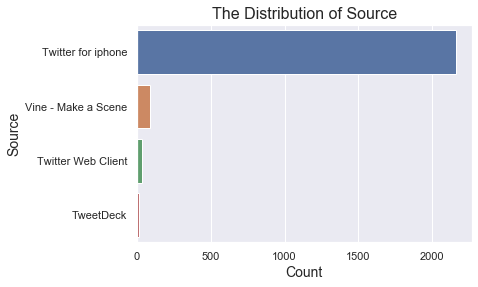

In [58]:
sorted_source = twitter_archive_clean['source'].value_counts().index
print(twitter_archive_clean['source'].value_counts())
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

> From the plot above we discovered that:
   - That the highest precent source of tweet , retweets and other staff from the twiiter for iphone (Twitter Application)
   - And the tweetDesk is rare and its percent is so little

### 2. Visualization of The Distribution of Dog Stages

Text(0.5, 1.0, 'The Distribution of Dog Stages')

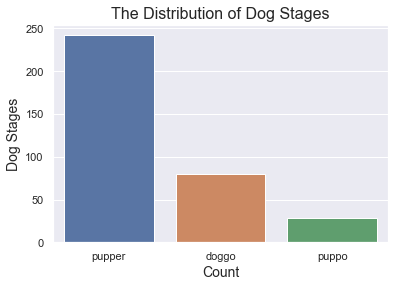

In [59]:
sorted_stage = twitter_archive_clean['stage'].value_counts().head(3).index
sns.set(style="darkgrid")
sns.countplot(data = twitter_archive_clean, x = 'stage', order = sorted_stage, orient = 'h')
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Dog Stages', fontsize=14)
plt.title('The Distribution of Dog Stages',fontsize=16)

> As we see here that :
  - the most common dog type is the pupper type , and that maybe due to that the young dog is look better than the adult
  - and as we saw in the data set info that we had a lot of missing values in the dog types

### 3. Visualization of relation Retweet_count and favorite_count

In [60]:
twitter_archive_clean.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
tweet_id,1.000000,0.022872,-0.026395,0.403763,0.544145
rating_numerator,0.022872,1.000000,0.197282,0.012418,0.010694
rating_denominator,-0.026395,0.197282,1.000000,-0.022340,-0.023004
retweet_count,0.403763,0.012418,-0.022340,1.000000,0.700701
favorite_count,0.544145,0.010694,-0.023004,0.700701,1.000000


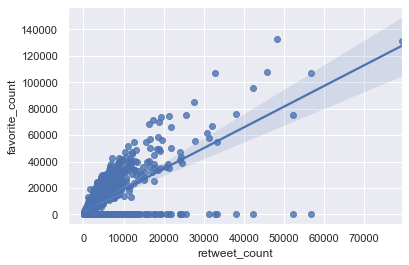

In [61]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive_clean)

> From the discovered correlation table :
   - we have a positive strong correlation between favorite acount and retweet count , and that's common the more it's favorite the more it will have retweets 
   - and the graph is showing that correlation

### 4. Visualization of The Classification of Dogs Results Analysis

In [62]:
df_img_clean.head()

,tweet_id,jpg_url,img_num,first_prediction,first_confidence,first_dog,second_prediction,second_confidence,second_dog,third_prediction,third_confidence,third_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [63]:
df_img_clean['first_prediction'].value_counts().head(10)

Golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
Pug                    57
Chow                   44
Samoyed                43
Toy_poodle             39
Pomeranian             38
Cocker_spaniel         30
Name: first_prediction, dtype: int64

> we have the most common two types of dog breeds are Golden_retriever , Labrador_retriever

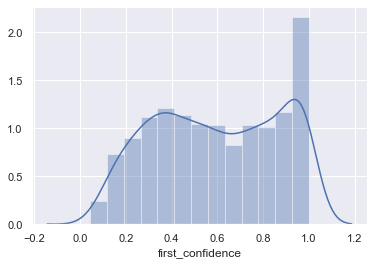

In [64]:
sns.set(style='darkgrid')
ax = sns.distplot(df_img_clean['first_confidence'])